In [124]:
import pandas as pd
from pathlib import Path
from pandas import ExcelFile
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import seaborn as sns
from pandas.tools.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
sns.set()

In [125]:
data_path = Path("C:\\Users\LEMAP\Desktop\System_Imbalance_Data_2016.txt")
df = pd.read_csv(data_path,delimiter = "\t",decimal=",")

In [126]:
dft = pd.DataFrame(data = df[[
 'Total.Minute',
 'Total.Quarter',
 'Year',
 'Month',
 'Day',
 'Hour',
 'Quarter',
 'Minute','CumSum.NRV',
 'Tot.NRV.Quarter',"NRV","NRV_1","NRV_2","SI","SI_1","SI_2","WEEKDAY"]])


In [139]:
dft.head(3)

,Total.Minute,Total.Quarter,Year,Month,Day,Hour,Quarter,Minute,CumSum.NRV,Tot.NRV.Quarter,NRV,NRV_1,NRV_2,SI,SI_1,SI_2,WEEKDAY
0,1,1,2016,1,1,0,1,1,0.000,803.357,-61.338,-139.932,-147.582,76.137,180.672,225.388,5
1,2,1,2016,1,1,0,1,2,-61.338,803.357,-55.369,-61.338,-139.932,31.560,76.137,180.672,5
2,3,1,2016,1,1,0,1,3,-116.707,803.357,-63.535,-55.369,-61.338,18.963,31.560,76.137,5


In [140]:
dft.describe()

,Total.Minute,Total.Quarter,Year,Month,Day,Hour,Quarter,Minute,CumSum.NRV,Tot.NRV.Quarter,NRV,NRV_1,NRV_2,SI,SI_1,SI_2,WEEKDAY
count,527040.000000,527040.000000,527040.0,527040.000000,527040.000000,527040.000000,527040.000000,527040.000000,527040.000000,527040.000000,526552.000000,526552.000000,526552.000000,526802.000000,526802.000000,526802.000000,527040.000000
mean,263520.500000,17568.500000,2016.0,6.514458,15.757172,11.500000,2.500000,8.000000,-63.787460,-117.356364,-7.831009,-7.831454,-7.831840,7.585692,7.585990,7.586519,4.008197
std,152143.487274,10142.899148,0.0,3.451234,8.812032,6.922193,1.118035,4.320498,1046.255241,1845.014171,135.265037,135.265086,135.265195,163.044855,163.045028,163.045283,1.997935
min,1.000000,1.000000,2016.0,1.000000,1.000000,0.000000,1.000000,1.000000,-10434.728000,-11178.000000,-862.265000,-862.265000,-862.265000,-4018.343000,-4018.343000,-4018.343000,1.000000
25%,131760.750000,8784.750000,2016.0,4.000000,8.000000,5.750000,1.750000,4.000000,-528.482000,-1323.554000,-101.131000,-101.131250,-101.132000,-90.435750,-90.435750,-90.435750,2.000000
50%,263520.500000,17568.500000,2016.0,7.000000,16.000000,11.500000,2.500000,8.000000,0.000000,-138.935000,-8.590000,-8.590500,-8.591000,9.509500,9.509500,9.510500,4.000000
75%,395280.250000,26352.250000,2016.0,10.000000,23.000000,17.250000,3.250000,12.000000,379.307000,1063.056000,83.634250,83.631750,83.631750,106.994000,106.994750,106.995000,6.000000
max,527040.000000,35136.000000,2016.0,12.000000,31.000000,23.000000,4.000000,15.000000,10930.200000,11711.600000,819.000000,819.000000,819.000000,1101.115000,1101.115000,1101.115000,7.000000


In [127]:
is_5 = dft["Minute"]==5
is_5.head()
dft_5 = dft[is_5]

In [128]:
def clean_dataset(dataframe):
    assert isinstance(dataframe, pd.DataFrame), 
    dataframe.dropna(inplace=True)
    indices_to_keep = ~dataframe.isin([np.nan, np.inf, -np.inf]).any(1)
    return dataframe[indices_to_keep].astype(np.float64)

In [129]:
dft_5 = clean_dataset(dft_5)

C:\Users\LEMAP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
tot = pd.DataFrame(dft_5["Tot.NRV.Quarter"])

In [131]:
X = pd.DataFrame(dft_5[['NRV',"NRV_1","NRV_2","SI","CumSum.NRV"]])

In [132]:
X.shape , tot.shape

((35084, 5), (35084, 1))

In [138]:
ar = [4.53826398, -0.62231812, -1.36149538, -4.1291162 ,  1.48801795]
X = X*ar
pred = X['NRV'] +X["NRV_1"] + X["NRV_2"] +X["SI"] + X["CumSum.NRV"]


In [134]:
x = tot
y = pred

Text(0.5, 1.0, 'Predicted Value of Total NRV vs Actual NRV (2016-Out Sample)')

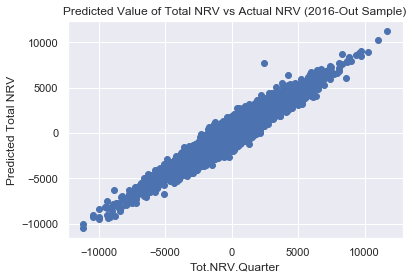

In [137]:
plt.scatter(x,y)
plt.plot([-10000,-10000],[10000,10000],linestyle = 'solid', color="red")
plt.xlabel('Tot.NRV.Quarter')
plt.ylabel('Predicted Total NRV')
plt.title('Predicted Value of Total NRV vs Actual NRV (2016-Out Sample)')